In [2]:
# Dependencies and Setup

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

customer_data_to_load = Path("Resources/customer_segmentation_data.csv")

customer_segmentation = pd.read_csv(customer_data_to_load)

customer_segmentation.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [3]:
# Calculate # of unique customers

number_customer = customer_segmentation['Customer ID'].nunique()
number_customer

40259

In [4]:
# Add a column "Customer Number" in the csv file
# Every row is considered as a different customer, even having the same customer ID

counter = 0

for index, row in customer_segmentation.iterrows():
    if pd.notna(row['Customer ID']):
        counter += 1
    customer_segmentation.at[index, 'Customer Number'] = counter

customer_segmentation.insert(1, 'Customer Number', customer_segmentation.pop('Customer Number'))

resources_folder = Path("Resources")

customer_segmentation.to_csv(resources_folder / "modified_customer_segmentation.csv", index=False)

customer_segmentation.head()

,Customer ID,Customer Number,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,1.0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,...,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,2.0,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,...,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,3.0,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,...,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,4.0,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,...,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,5.0,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,...,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [19]:
# Customer_Num = customer_segmentation.set_index(["Customer Number"])["Coverage Amount"]
# print(Customer_Num.reset_index().head().to_string(header=["Customer Number","Coverage Amount"], index=False))

Customer_Num = customer_segmentation[['Customer Number', 'Age', 'Coverage Amount']]
Customer_Num.head()

,Customer Number,Age,Coverage Amount
0,1.0,23,366603
1,2.0,26,780236
2,3.0,29,773926
3,4.0,20,787815
4,5.0,25,366506


In [10]:
# Establish the bins
age_bracket = [0, 20, 40, 60, 80]
labels = ["<20", "20-40", "40-60", "60-80"]

In [20]:
Customer_Num["Age"] = Customer_Num["Age"].astype(float)
Customer_Num["Coverage Range by Customer #"] = pd.cut(Customer_Num["Age"], bins=age_bracket, labels=labels, include_lowest=True)

Customer_Num.head()

C:\Users\nelso\AppData\Local\Temp\ipykernel_10176\1276901241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Num["Age"] = Customer_Num["Age"].astype(float)
C:\Users\nelso\AppData\Local\Temp\ipykernel_10176\1276901241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Num["Coverage Range by Customer #"] = pd.cut(Customer_Num["Age"], bins=age_bracket, labels=labels, include_lowest=True)


,Customer Number,Age,Coverage Amount,Coverage Range by Customer #
0,1.0,23.0,366603,20-40
1,2.0,26.0,780236,20-40
2,3.0,29.0,773926,20-40
3,4.0,20.0,787815,<20
4,5.0,25.0,366506,20-40


In [24]:
age_bracket_coverage = Customer_Num.groupby(["Coverage Range by Customer #"])["Coverage Amount"].mean()

age_bracket_coverage_summary = pd.DataFrame({
    "Average Age Coverage Amount": age_bracket_coverage
})

age_bracket_coverage_summary

C:\Users\nelso\AppData\Local\Temp\ipykernel_10176\2533959902.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bracket_coverage = Customer_Num.groupby(["Coverage Range by Customer #"])["Coverage Amount"].mean()


,Average Age Coverage Amount
Coverage Range by Customer #,
<20,493848.635833
20-40,490832.704803
40-60,492716.769343
60-80,495705.711871


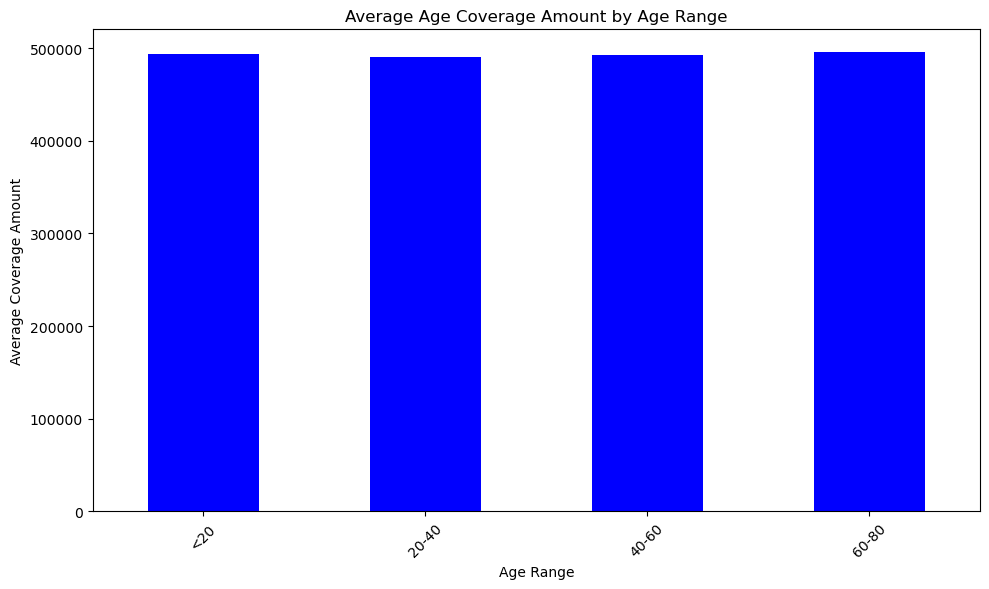

In [27]:
# Plotting the bar chart
age_bracket_coverage_summary.plot(kind='bar', color='blue', figsize=(10, 6), legend=False)

# Adding labels and title
plt.title('Average Age Coverage Amount by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Coverage Amount')

# Showing the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()